# Hausaufgabe 3

### Abgage via studip bis spätestens 22.05. 12:00 Uhr (zur VL)! 
### Verteidigung 25.05. 08:00-11:00 Uhr (Timeslots auf StudIP)!


- In jedem Blatt kann maximal 5% Bonus erreicht werden, falls:
    - Mind. 60% des Arbeitsblatts korrekt bearbeitet wurde und
    - das Arbeitsblatt erfolgreich verteidigt (den Tutoren erklärt) wurde.
    - Bonus % = 5% * Teil der Hausaufgabe erfolgreich verteidigt
    - Erfolgreiche Verteidigung: Ein von uns ausgewähltes Team-Mitglied erklärt die Lösung und beantwortet Fragen dazu.
    - ChatGPT und andere Hilfsmittel dürfen verwendet werden, müssen aber zitiert werden.
    - Code muss ohne Hilfsmittel erläutert werden
- Wir bewerten nicht nur die Korrektheit der Ergebnisse, sondern auch ob der Code effizient, einfach zu verstehen, aufgeräumt und gut dokumentiert ist.
- Geben Sie eine Lösung pro Gruppe ab und packen Sie Ihre Lösung in eine Zip-Datei mit dem Namen und Matrikelnummer eines Mitglieds. Also z.B. `mustermann_12345678.zip` 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Aufgabe 1

In den folgenden Teilaufgaben ist das Ergebnis immer mit angegeben, damit Sie alle Aufgaben bearbeiten können, auch wenn Sie eine Teilaufgabe nicht lösen können. Punkte gibt es selbstverständlich nur, falls Sie das Ergebnis selbstständig mit Numpy Funktionen produzieren.

a) [5%] Erstellen Sie folgenden Numpy Array:
```
arr = np.array([[ 1. ,  1.5,  2. ,  2.5,  3. ],
                [ 3.5,  4. ,  4.5,  5. ,  5.5],
                [ 6. ,  6.5,  7. ,  7.5,  8. ],
                [ 8.5,  9. ,  9.5, 10. , 10.5],
                [11. , 11.5, 12. , 12.5, 13. ],
                [13.5, 14. , 14.5, 15. , 15.5],
                [16. , 16.5, 17. , 17.5, 18. ],
                [18.5, 19. , 19.5, 20. , 20.5]])
```

In [2]:
arr = np.arange(1, 21, 0.5)
arr = np.reshape(arr, (8, 5))
arr

array([[ 1. ,  1.5,  2. ,  2.5,  3. ],
       [ 3.5,  4. ,  4.5,  5. ,  5.5],
       [ 6. ,  6.5,  7. ,  7.5,  8. ],
       [ 8.5,  9. ,  9.5, 10. , 10.5],
       [11. , 11.5, 12. , 12.5, 13. ],
       [13.5, 14. , 14.5, 15. , 15.5],
       [16. , 16.5, 17. , 17.5, 18. ],
       [18.5, 19. , 19.5, 20. , 20.5]])

Quelle: https://www.youtube.com/watch?v=DcfYgePyedM&list=WL&index=4&ab_channel=Mr.PSolver

b) [5%] Finden Sie die Indicies, in denen der Array ganze Zahlen beinhaltet.
```
idx = np.array([[ True, False,  True, False,  True],
                [False,  True, False,  True, False],
                [ True, False,  True, False,  True],
                [False,  True, False,  True, False],
                [ True, False,  True, False,  True],
                [False,  True, False,  True, False],
                [ True, False,  True, False,  True],
                [False,  True, False,  True, False]])
```

In [3]:
arr = arr.ravel()
idx = arr % 1 == 0
idx = np.reshape(idx, (8, 5))
idx


array([[ True, False,  True, False,  True],
       [False,  True, False,  True, False],
       [ True, False,  True, False,  True],
       [False,  True, False,  True, False],
       [ True, False,  True, False,  True],
       [False,  True, False,  True, False],
       [ True, False,  True, False,  True],
       [False,  True, False,  True, False]])

c) [10%] Nutzen Sie die Indicies um alle ganzen Zahlen aus dem Array zu bekommen. \
Teilen Sie dann diesen Array auf in zwei gleich große Arrays. Der Schnittpunkt sollte automatisch errechnet werden, also keine feste Zahl per Hand eintragen.

Tipp: Beachten Sie, dass Sie dazu den berechneten Schnittpunkt mit Hilfe der `int()` Funktion von einem Float in einen Integer umwandeln müssen, weil Indicies den Type Integer haben müssen. 
```
arr_1 = np.array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])
arr_2 = np.array([11., 12., 13., 14., 15., 16., 17., 18., 19., 20.])
```

In [4]:
whole_nums = arr[arr % 1 == 0]
arr_1 = whole_nums[: (len(whole_nums)) // 2]
arr_2 = whole_nums[(len(whole_nums)) // 2 :]
print(arr_1)
print(arr_2)


[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[11. 12. 13. 14. 15. 16. 17. 18. 19. 20.]


## Aufgabe 2

In dieser Aufgabe werden Sie eine 2D normal-verteilte (Gauss-Verteilung) Punktewolke erstellen und diese mit Hilfe einer Rotationsmatrix um die eigene Achse rotieren. Sollten Sie einzelne Teilaufgaben nicht lösen können, können Sie die Ergebnisse laden und mit den verbleibenden Teilaufgaben fortfahren.

a) [10%] Erstellen Sie einen Array mit 2000 Samplen aus einer 2D multivariaten Gauss Verteilung mit Mittelwert `np.array([0, 0])` und Covarianz `cov = np.array([[1, 0.], [0., 10]])`. 

Stellen Sie sicher, dass Sie Ihre Daten reproduzieren können, indem Sie sich informieren, was ein **Seed** ist. Setzen Sie diesen **Seed** auf die Zahl `101`.

```
Backup data:
data = np.load("backup_data_2a.npy")
```

In [5]:
np.random.seed(101)
# Beim auskommentierten data = habe ich die Werte aus der Aufgabenstellung übernommen,
# beim zweiten habe ich cov so angepasst, dass die plots bei 2c exakt mit der Vorlage übereinstimmen
# data = np.random.multivariate_normal(mean=np.array([0, 0]), cov=np.array([[1, 0.], [0., 20]]), size=2000)
data = np.random.multivariate_normal(
    mean=np.array([0, 0]), cov=np.array([[1, 0.0], [0.0, 20]]), size=2000
)
# data = np.load("backup_data_2a.npy")
print(data)


[[ 0.62813271 12.10540049]
 [ 0.50382575  4.06056281]
 [-0.31931804  2.91188799]
 ...
 [-1.48197413  1.99887437]
 [ 1.18154159  6.84500004]
 [-0.74131681  2.23585443]]


b) [15%] Definieren Sie eine Funktion, die Ihnen eine Rotationsmatrix abhängig von einem Rotationswinkel $\theta$ erstellt

In [6]:
from numpy import sin, cos


def get_rotation_matrix(theta):
    # Programmieren Sie diese Funktion

    rotation_matrix = np.array(
        [[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]]
    )

    return rotation_matrix


Quelle: https://en.wikipedia.org/wiki/Rotation_matrix

In [7]:
theta = np.radians(40)
r_matrix = get_rotation_matrix(theta)
data_rotated = data @ r_matrix
print(r_matrix)
print(data_rotated)

[[ 0.76604444 -0.64278761]
 [ 0.64278761  0.76604444]]
[[8.26237902 8.86951886]
 [2.99603238 2.78671862]
 [1.6271137  2.43588929]
 ...
 [0.14959363 2.48382121]
 [5.30499458 4.48409395]
 [0.8692979  2.18927312]]


c) [55%] Erstellen Sie einen Plot, der möglichst ähnlich aussieht, wie der Beispielplot: 

Tipps: 
- Viele der hier verwendeten Funktionen wurden nicht in der Vorlesung oder im Tutorat behandelt - Google hilft!
- Sie können die Daten leicht in einem Scatterplot plotten, wenn Sie den Datenarray transponieren und dann mit `*` an die Plot-Funktion weitergeben: `ax.scatter(*data.T)`
- Das Kreuz, das den Mittelwert anzeigt, ist ein eigener Plot bestehend aus nur einem Punkt
- Die Transparanz in den Punkten und Histogrammen ist hilfreich, wenn man Dinge sichtbar machen will, die sich überlagern

![Exercise_plot.JPG](Exercise_plot.JPG)

/tmp/ipykernel_1701/3056214308.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1).spines[['right', 'top']].set_visible(False)


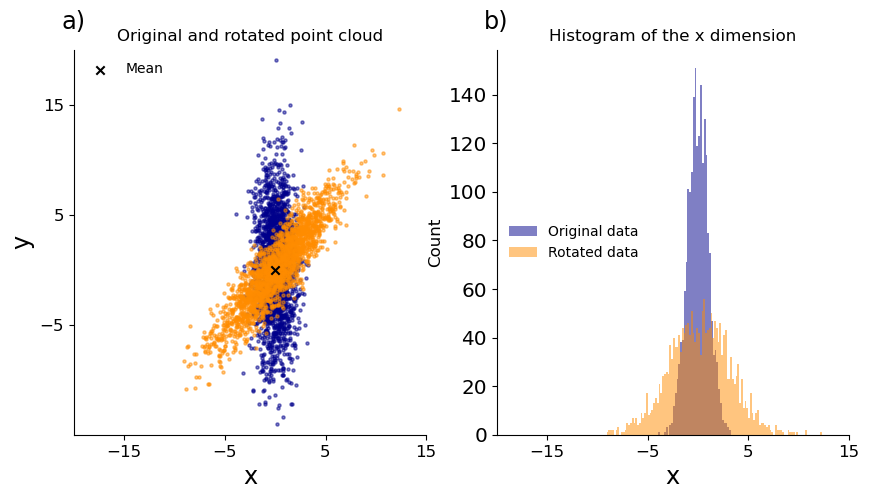

In [8]:
plt.subplots(figsize=(10, 5))
plt.subplot(1, 2, 1).spines[["right", "top"]].set_visible(False)
plt.scatter(*data.T, alpha=0.5, color="darkblue", s=5)
plt.scatter(*data_rotated.T, alpha=0.5, color="darkorange", s=5)
plt.text(
    -20.0,
    22.5,
    "a)",
    fontsize="xx-large",
    verticalalignment="center",
    horizontalalignment="center",
)
plt.scatter(0, 0, marker="x", color="black", label="Mean")
plt.title("Original and rotated point cloud")
plt.xlabel("x", fontsize="xx-large")
plt.ylabel("y", fontsize="xx-large")
plt.xticks([-15, -5, 5, 15], fontsize="large")
plt.yticks([-5, 5, 15], fontsize="large")
plt.xlim(-20, 15)
plt.ylim(-15, 20)
plt.legend(loc=2, frameon=False)

plt.subplot(1, 2, 2).spines[["right", "top"]].set_visible(False)
plt.hist(data[:, 0], bins=40, alpha=0.5, label="Original data", color="darkblue")
plt.hist(
    data_rotated[:, 0], bins=120, alpha=0.5, label="Rotated data", color="darkorange"
)
plt.text(
    -20.0,
    170.0,
    "b)",
    fontsize="xx-large",
    verticalalignment="center",
    horizontalalignment="center",
)
plt.xlim(-20, 15)
plt.title("Histogram of the x dimension")
plt.xlabel("x", fontsize="xx-large")
plt.ylabel("Count", fontsize="large")
plt.xticks([-15, -5, 5, 15], fontsize="large")
plt.yticks(fontsize="x-large")
plt.legend(loc=6, frameon=False)


### Quellen:
- https://stackoverflow.com/questions/925024/how-can-i-remove-the-top-and-right-axis-in-matplotlib
- https://www.geeksforgeeks.org/place-plots-side-by-side-in-matplotlib/
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html